<a href="https://colab.research.google.com/github/sidheshsahu/House_Price_Prediction/blob/main/MumbaiHousePricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/updated house prices.csv")

In [ ]:
df.head()

,Unnamed: 0,bhk,type,area,price,price_unit,region,status
0,356,3,Apartment,1076,3.19,Cr,Andheri,Under Construction
1,357,3,Apartment,1076,3.19,Cr,Andheri,Under Construction
2,358,3,Apartment,1076,3.19,Cr,Andheri,Under Construction
3,359,2,Apartment,718,2.12,Cr,Andheri,Under Construction
4,360,3,Apartment,1076,3.19,Cr,Andheri,Under Construction


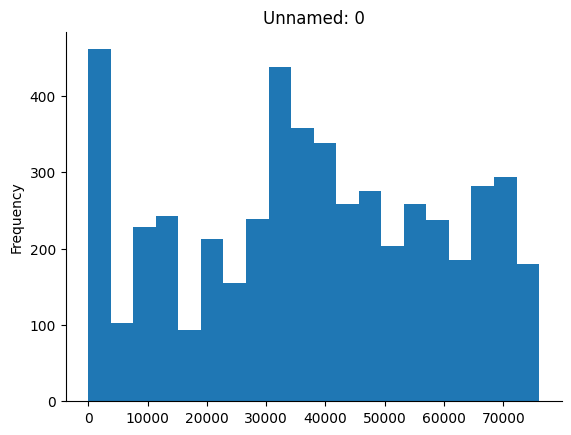

In [ ]:
# @title Unnamed: 0

from matplotlib import pyplot as plt
df['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
bhk,0
type,0
area,0
price,0
price_unit,0
region,0
status,0


In [ ]:
df1=df.drop(["Unnamed: 0","status"],axis=1)

In [ ]:
df1.head()

,bhk,type,area,price,price_unit,region
0,3,Apartment,1076,3.19,Cr,Andheri
1,3,Apartment,1076,3.19,Cr,Andheri
2,3,Apartment,1076,3.19,Cr,Andheri
3,2,Apartment,718,2.12,Cr,Andheri
4,3,Apartment,1076,3.19,Cr,Andheri


In [ ]:
df1['bhk'].unique()

array([3, 2, 1, 4, 8, 5, 6, 9, 7])

In [ ]:
df1.shape

(5042, 6)

In [ ]:
df1['type'].unique()

array(['Apartment', 'Studio Apartment', 'Independent House', 'Villa'],
      dtype=object)

In [ ]:
df1['type'] = df1['type'].replace('Independent House', 'Bungalows')

In [ ]:
df1['type'].unique()

array(['Apartment', 'Studio Apartment', 'Bungalows', 'Villa'],
      dtype=object)

In [ ]:
df1['region'].unique()

array(['Andheri', 'Bandra', 'Dadar', 'Ghatkopar', 'Lower Parel', 'Mumbai'],
      dtype=object)

In [ ]:
print(df1)

      bhk       type  area  price price_unit       region
0       3  Apartment  1076   3.19         Cr      Andheri
1       3  Apartment  1076   3.19         Cr      Andheri
2       3  Apartment  1076   3.19         Cr      Andheri
3       2  Apartment   718   2.12         Cr      Andheri
4       3  Apartment  1076   3.19         Cr      Andheri
...   ...        ...   ...    ...        ...          ...
5037    3  Apartment  3048   7.25         Cr  Lower Parel
5038    1  Apartment   300  70.00          L  Lower Parel
5039    3  Apartment  1974   5.50         Cr  Lower Parel
5040    5  Apartment  9000  30.00         Cr  Lower Parel
5041    1  Apartment   500  29.99          L       Mumbai

[5042 rows x 6 columns]


In [ ]:
df1['region'].unique()

array(['Andheri', 'Bandra', 'Dadar', 'Ghatkopar', 'Lower Parel', 'Mumbai'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['type'] = label_encoder.fit_transform(df1['type'])
state_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print state to number mapping
print("State to number mapping:")
for state, number in state_mapping.items():
    print(f"{state}: {number}")


State to number mapping:
Apartment: 0
Bungalows: 1
Studio Apartment: 2
Villa: 3


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['region']= label_encoder.fit_transform(df1['region'])

state_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print state to number mapping
print("State to number mapping:")
for state, number in state_mapping.items():
    print(f"{state}: {number}")


State to number mapping:
Andheri: 0
Bandra: 1
Dadar: 2
Ghatkopar: 3
Lower Parel: 4
Mumbai: 5


In [ ]:
df1

,bhk,type,area,price,price_unit,region
0,3,0,1076,3.19,Cr,0
1,3,0,1076,3.19,Cr,0
2,3,0,1076,3.19,Cr,0
3,2,0,718,2.12,Cr,0
4,3,0,1076,3.19,Cr,0
...,...,...,...,...,...,...
5037,3,0,3048,7.25,Cr,4
5038,1,0,300,70.00,L,4
5039,3,0,1974,5.50,Cr,4
5040,5,0,9000,30.00,Cr,4


In [ ]:
df1.shape

(5042, 6)

In [ ]:
df1['type'].unique()

array([0, 2, 1, 3])

In [ ]:
def convert_to_lakhs(price, unit):
    if unit == 'Cr':
        return price * 100
    elif unit == 'L':
        return price

df1['price_lakhs'] = df1.apply(lambda row: convert_to_lakhs(row['price'], row['price_unit']), axis=1)





In [ ]:
df1.drop(['price', 'price_unit'], axis=1, inplace=True)


print(df1)

      bhk  type  area  region  price_lakhs
0       3     0  1076       0       319.00
1       3     0  1076       0       319.00
2       3     0  1076       0       319.00
3       2     0   718       0       212.00
4       3     0  1076       0       319.00
...   ...   ...   ...     ...          ...
5037    3     0  3048       4       725.00
5038    1     0   300       4        70.00
5039    3     0  1974       4       550.00
5040    5     0  9000       4      3000.00
5041    1     0   500       5        29.99

[5042 rows x 5 columns]


In [ ]:
df1['type']

,type
0,0
1,0
2,0
3,0
4,0
...,...
5037,0
5038,0
5039,0
5040,0


In [ ]:
df1.head()

,bhk,type,area,region,price_lakhs
0,3,0,1076,0,319.0
1,3,0,1076,0,319.0
2,3,0,1076,0,319.0
3,2,0,718,0,212.0
4,3,0,1076,0,319.0


In [ ]:
X=df1.drop('price_lakhs',axis=1)

In [ ]:
y=df1['price_lakhs']

In [ ]:
print(X)

      bhk  type  area  region
0       3     0  1076       0
1       3     0  1076       0
2       3     0  1076       0
3       2     0   718       0
4       3     0  1076       0
...   ...   ...   ...     ...
5037    3     0  3048       4
5038    1     0   300       4
5039    3     0  1974       4
5040    5     0  9000       4
5041    1     0   500       5

[5042 rows x 4 columns]


In [ ]:
print(y)

0        319.00
1        319.00
2        319.00
3        212.00
4        319.00
         ...   
5037     725.00
5038      70.00
5039     550.00
5040    3000.00
5041      29.99
Name: price_lakhs, Length: 5042, dtype: float64


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bhk     5042 non-null   int64
 1   type    5042 non-null   int64
 2   area    5042 non-null   int64
 3   region  5042 non-null   int64
dtypes: int64(4)
memory usage: 157.7 KB


In [ ]:
y.info()
!pip install scikit_learn==1.4.1.post1

<class 'pandas.core.series.Series'>
RangeIndex: 5042 entries, 0 to 5041
Series name: price_lakhs
Non-Null Count  Dtype  
--------------  -----  
5042 non-null   float64
dtypes: float64(1)
memory usage: 39.5 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
import joblib
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')


R^2 Score: 0.8776584517772712


In [ ]:
single_record = np.array([[	 3    , 0  ,1076    ,   0]])
#bhk apartment  area size region=Lower parel


prediction = model.predict(single_record)

print("Prediction:", prediction)

Prediction: [298.6541567]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import sklearn
print(sklearn.__version__)


1.5.2
